In [148]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [146]:
logins = pd.read_json('logins.json')
logins['count'] = 1
logins.set_index('login_time',inplace=True)
logins = logins.resample('15t').sum()
logins['year'] = logins.index.year
logins['month'] = logins.index.month
logins['day_of_month'] = logins.index.day
logins['hour'] = logins.index.hour
logins['hour_intervals'] = logins.index.minute
logins['day_of_week'] = logins.index.dayofweek

day_of_week = {0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday'}
logins['day_of_week_named'] = logins['day_of_week'].map(day_of_week)
logins.head()

,count,year,month,day_of_month,hour,hour_intervals,day_of_week,day_of_week_named
login_time,,,,,,,,
1970-01-01 20:00:00,2,1970,1,1,20,0,3,Wednesday
1970-01-01 20:15:00,6,1970,1,1,20,15,3,Wednesday
1970-01-01 20:30:00,9,1970,1,1,20,30,3,Wednesday
1970-01-01 20:45:00,7,1970,1,1,20,45,3,Wednesday
1970-01-01 21:00:00,1,1970,1,1,21,0,3,Wednesday


In [147]:
group_month = logins[['count','month']].groupby(by='month').count()
print(group_month)
group_day = logins[['count','day_of_month']].groupby('day_of_month').mean()
print(group_day[:10])
group_hour_intervals = logins[['count','hour_intervals']].groupby('hour_intervals').mean()
print(group_hour_intervals)

       count
month       
1       2896
2       2688
3       2976
4       1228
                  count
day_of_month           
1             10.506579
2              7.927083
3              9.049479
4             10.513021
5              8.393229
6              8.544271
7             10.432292
8             10.466146
9              7.375000
10             8.585938
                   count
hour_intervals          
0               9.260319
15              9.389048
30              9.792399
45              9.621986


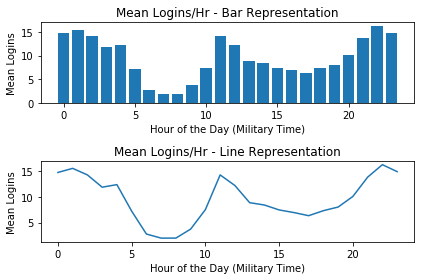

In [149]:
group_hour = logins[['count','hour']].groupby('hour').mean()

plt.subplot(2,1,1)
plt.title('Mean Logins/Hr - Bar Representation')
plt.bar(x = group_hour.index, height = group_hour['count'])
plt.xlabel('Hour of the Day (Military Time)')
plt.ylabel('Mean Logins')

plt.subplot(2,1,2)
plt.title('Mean Logins/Hr - Line Representation')
plt.plot(group_hour)
plt.xlabel('Hour of the Day (Military Time)')
plt.ylabel('Mean Logins')
plt.tight_layout()
plt.show()

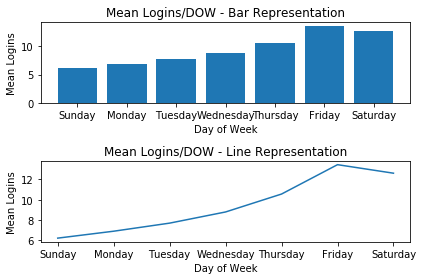

In [150]:
group_day_of_week = logins[['day_of_week','day_of_week_named','count']].groupby('day_of_week_named').mean()
group_day_of_week = group_day_of_week.sort_values('day_of_week')
group_day_of_week.drop('day_of_week',axis = 1,inplace=True)

plt.subplot(2,1,1)
plt.title('Mean Logins/DOW - Bar Representation')
plt.bar(x = group_day_of_week.index, height = group_day_of_week['count'])
plt.xlabel('Day of Week')
plt.ylabel('Mean Logins')

plt.subplot(2,1,2)
plt.title('Mean Logins/DOW - Line Representation')
plt.plot(group_day_of_week)
plt.xlabel('Day of Week')
plt.ylabel('Mean Logins')
plt.tight_layout()
plt.show()